In [1]:
import fenics as fn
import numpy as np
from matplotlib import pyplot as plt

**Number of elements**

In [2]:
Ne = 5

**Mesh definition**

In [3]:
mesh = fn.UnitIntervalMesh(Ne)

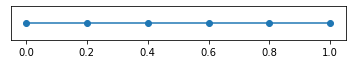

In [4]:
fn.plot(mesh)

**Finite element space**
$$\mathbb{U}_n := \{\phi_1,\phi_2,\dots,\phi_n\}$$

In [5]:
Un = fn.FunctionSpace(mesh,'CG',1)

$$-\Delta u = f \text{   en } \Omega$$
$$u = 0 \text{    sobre } \partial\Omega$$

$$\int \nabla u \cdot \nabla v = \int f v$$

**Trial and test functions**

In [6]:
uh = fn.TrialFunction(Un)
vh = fn.TestFunction(Un)

**Implementation of the variational formulation**

In [7]:
b = fn.inner(fn.grad(uh),fn.grad(vh))*(fn.dx)
l = fn.Constant(2.)*vh*(fn.dx)

**Boundary condition**

In [8]:
g = fn.Constant(0.)
bc = fn.DirichletBC (Un, g, 'on_boundary')

**Finite element function**
$$u_n(x) = \sum_{i=1}^{n} c_i \phi_{i}(x)$$

In [9]:
un = fn.Function(Un)

## Solver

**Option 1: Solve directly with a Fenics function**

In [10]:
fn.solve(b == l, un, bc)

Solving linear variational problem.


Access to $\{c_i\}_{i=1}^{n}$

In [11]:
print(un.vector()[:])

[0.   0.16 0.24 0.24 0.16 0.  ]


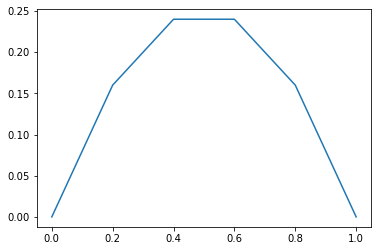

In [12]:
fn.plot(un)

**Option 2: Get the matrices from Fenics and solve using an external solver**

In [13]:
B = fn.assemble(b)
L = fn.assemble(l)

Apply boundary condition

In [14]:
bc.apply(B)
bc.apply(L)

Transform to a numpy matrix/vector

In [15]:
B_np = fn.as_backend_type(B).mat()[:,:]
L_np = L[:]

solve the linear system

In [16]:
vec = np.linalg.solve(B_np,L_np)

create a $\mathbb{U}_n$ function

In [17]:
un = fn.Function(Un)

assign the solution of the linear system to $\{c_i\}_{i=1}^{n}$ in 
$$u_n(x) = \sum_{i=1}^{n} c_i \phi_{i}(x)$$

In [18]:
un.vector()[:] = vec
print(un.vector()[:])

[-8.8817842e-17  1.6000000e-01  2.4000000e-01  2.4000000e-01
  1.6000000e-01  0.0000000e+00]


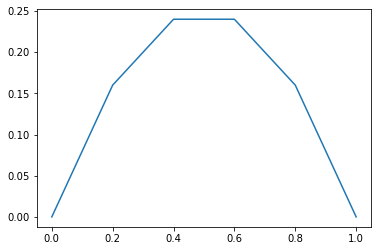

In [19]:
fn.plot(un)